Supervised Learning Algorithms - Linear Regression:
What is UCI data repository?
The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

<!-- Question -->
Consider any dataset from UCI repository.
Create a Simple Linear Regression model(Univariant) using the training data set.
Predict the scores on the test data and output RMSE(Root Mean Square Error).
Include appropriate code snippets to visualize the model.
Interpret the result.
Write the Inference.

In this Program the data set used is 'Advertising.csv' It shows the money spent on TV, Radio and Newspaper Ads and the Sales Income generated.
The Dataset is 200 rows and 5 columns. (TV, Radio,Newspaper and Sales). It has a Sl# column which is unnames.

Refer this Link to execute on GOOGLE COLAB :- https://colab.research.google.com/drive/1ejI3OAYBsNq2i35Q4r1BlCF_KnAyzqvs?usp=sharing

In [14]:
import pandas as pd
import numpy as np
data = pd.read_csv("Advertising.csv")
print(data.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [15]:
#Dropping the first Sl# column which is unnamed
# For permanent deleting of the column, use inplace=True in the drop method.
data.drop(['Unnamed: 0'], axis=1)
print(data.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


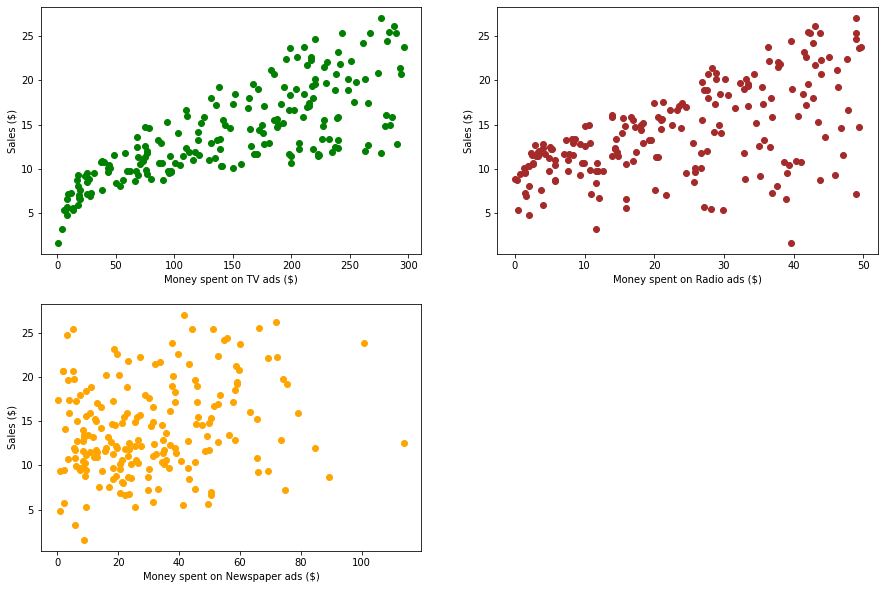

In [16]:
import matplotlib.pyplot as plt
# Note that the size is defined in inches, not pixels. This will result in a figure that's 15 in by 10 in in size:
myplt=plt.figure(figsize=(15,10))
# We've used the add_subplot() function, which accepts a series of numerical values. 
# The first number specifies how many rows you want to add to the figure, 
# the second number specifies how many columns you want to add, and 
# the third number specifies the number of the plot that you want to add.
ax1 = myplt.add_subplot(2,2,1)
ax1=plt.scatter(data['TV'], data['sales'], c='green')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")

ax2 = myplt.add_subplot(2,2,2)
ax2=plt.scatter(data['radio'],data['sales'],c='brown')
plt.xlabel("Money spent on Radio ads ($)")
plt.ylabel("Sales ($)")

ax3 = myplt.add_subplot(2,2,3)
ax3=plt.scatter(data['newspaper'],data['sales'],c='orange')
plt.xlabel("Money spent on Newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.show()


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Slope(m):  0.04387598792656935
Intercept(c):  7.600070326713404
The linear model of TV versus Sales is: Y = 7.6 + 0.044X


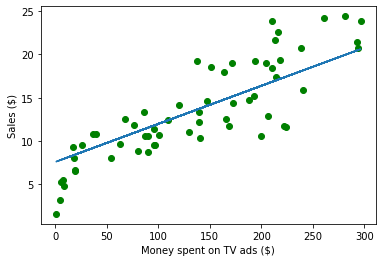

Root Mean Squared Error =  3.03721981184354


In [18]:
# https://www.youtube.com/watch?v=3wi0lJPfLUY
# reshape(-1,1) is necessory otherwise reg.fit() will lead to error
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)	

# Parameters of train_test_split()
# *arrays : sequence of indexables with same length / shape[0] Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
# test_size : float, int or None, optional (default=0.25) If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. By default, the value is set to 0.25. The default will change in version 0.21. It will remain 0.25 only if train_size is unspecified, otherwise it will complement the specified train_size.

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3) #Using sklearn library 70% Train and 30% Test 
reg = LinearRegression() #Using sklearn library 
reg.fit(x_train, y_train) #Fit the best fit regression line 

print("Slope(m): ", reg.coef_[0][0])
print("Intercept(c): ", reg.intercept_[0])
print("The linear model of TV versus Sales is: Y = {:.3} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))
#Y = {:.3} + {:.2}X is done to truncate the decimal points. hange this value and see the output.

predictions = reg.predict(x_test)
plt.scatter(x_test,y_test,c='green')
plt.plot(x_test,predictions)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

# https://www.askpython.com/python/examples/rmse-root-mean-square-error
# Have a look on the second example of the above link
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse) 

Slope(m):  0.20298912009981754
Intercept(c):  9.429713943962463
The linear model for Radio versus Sales is: Y = 9.43 + 0.2X


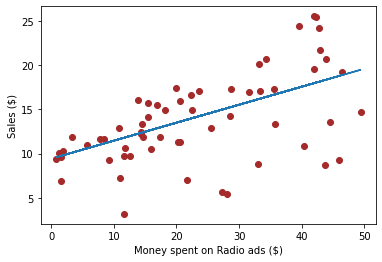

Root Mean Squared Error =  4.162516575804662


In [19]:
X = data['radio'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line

print("Slope(m): ", reg.coef_[0][0])
print("Intercept(c): ", reg.intercept_[0])
print("The linear model for Radio versus Sales is: Y = {:.3} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

predictions = reg.predict(x_test)
plt.scatter(x_test,y_test,c='brown')
plt.plot(x_test,predictions)
plt.xlabel("Money spent on Radio ads ($)")
plt.ylabel("Sales ($)")
plt.show()

rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

Slope(m):  0.05095487684883469
Intercept(c):  12.465681054983337
The linear model for Newspaper vs Sales is: Y = 12.5 + 0.051X


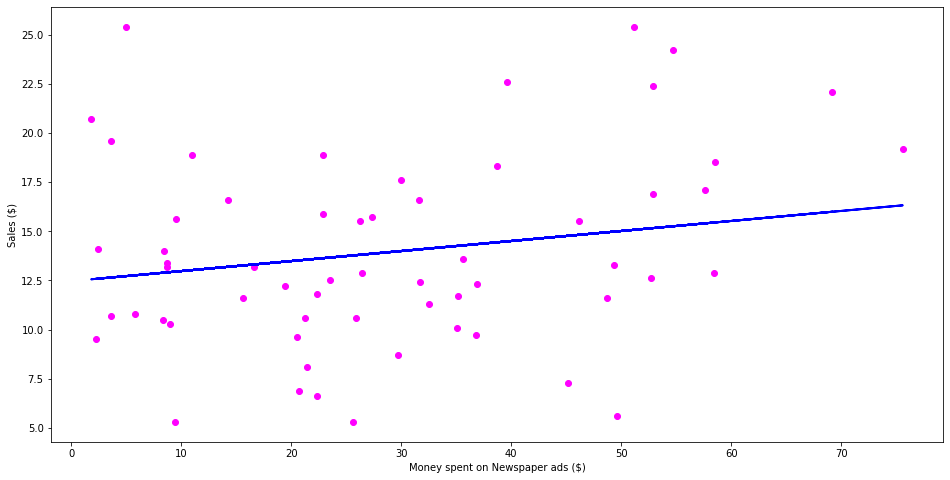

Root Mean Squared Error =  4.757727181177184


In [20]:
X = data['newspaper'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line

print("Slope(m): ", reg.coef_[0][0])
print("Intercept(c): ", reg.intercept_[0])
print("The linear model for Newspaper vs Sales is: Y = {:.3} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

predictions = reg.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(x_test,y_test,c='magenta')
plt.plot(x_test,predictions,c='blue',linewidth=2)
plt.xlabel("Money spent on Newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.show()

rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

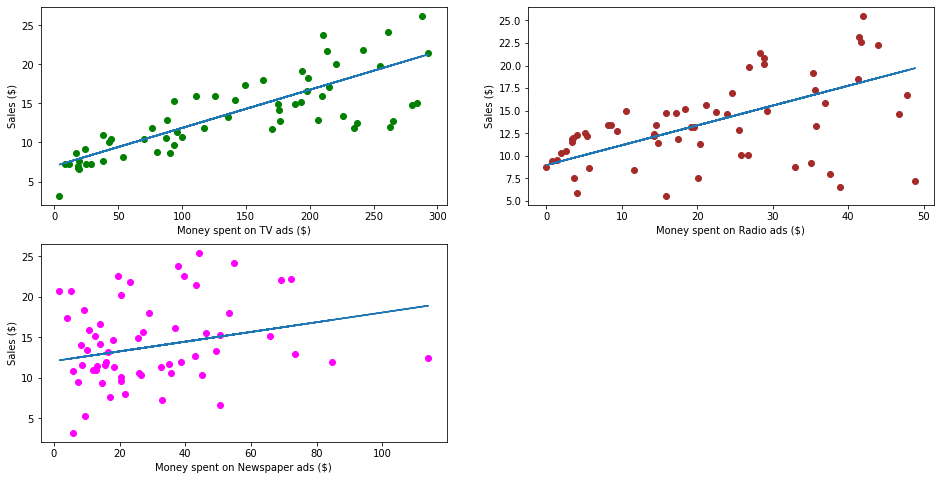

In [21]:
# This Cell box is just for plotting all the three plots in one figure
# TV vs SALES
X = data['TV'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line
predictions = reg.predict(x_test)
myplt = plt.figure(figsize=(16, 8))
ax1 = myplt.add_subplot(2, 2, 1)
ax1 = plt.scatter(x_test, y_test, c='green')
plt.plot(x_test, predictions)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")

# RADIO vs SALES
X = data['radio'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line
predictions = reg.predict(x_test)
ax2 = myplt.add_subplot(2, 2, 2)
ax2 = plt.scatter(x_test, y_test, c='brown')
plt.plot(x_test, predictions)
plt.xlabel("Money spent on Radio ads ($)")
plt.ylabel("Sales ($)")

# NEWSPAPER vs SALES
X = data['newspaper'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line
predictions = reg.predict(x_test)
ax3 = myplt.add_subplot(2, 2, 3)
ax3 = plt.scatter(x_test, y_test, c='magenta')
plt.plot(x_test, predictions)
plt.xlabel("Money spent on Newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.show()